<a href="https://colab.research.google.com/github/CharlotteY2003/MIT-Futuremakers/blob/main/7_14_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
from sklearn.metrics import confusion_matrix
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
import gzip

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = train.label
X_train = train.drop(['label'], axis=1)
X_train.shape

(42000, 784)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

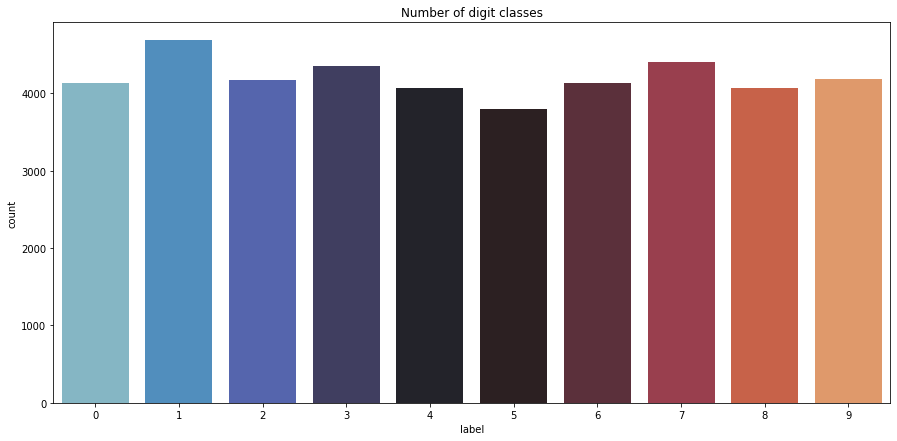

In [4]:
plt.figure(figsize = (15,7))
g = sns.countplot(y_train, palette='icefire')
plt.title("Number of digit classes")
y_train.value_counts()

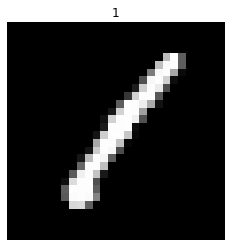

In [5]:
img = X_train.iloc[0].values
img = img.reshape(28,28)
plt.imshow(img, cmap = 'gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

In [6]:
X_train = X_train/255.0
test = test/255.0
print(X_train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [8]:
y_train = y_train.values.reshape(-1,1)
print(y_train.shape)

(42000, 1)


In [9]:
enc = OneHotEncoder()
y_train = enc.fit_transform(y_train).toarray()

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .1, random_state = 2)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


In [11]:
model = Sequential()
model.add(Conv2D(8, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(.25))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu', padding = 'Same'))
model.add(MaxPool2D(pool_size = (2,2), strides=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(256, activation='softmax'))
model.add(Dropout(.5))
model.add(Dense(10, activation='softmax'))

In [12]:
optimizer = Adam(lr=.001, beta_1 = .9, beta_2 = .999)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = optimizer, metrics = ['accuracy'])

In [14]:
epochs = 10
batch_size = 250

In [15]:
#Data Augumentation = artifically expand X_train by rotating image
datagen = ImageDataGenerator(rotation_range = 5, zoom_range = .1, width_shift_range = .1, height_shift_range = .1)
datagen.fit(X_train)

In [16]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (X_val, y_val), steps_per_epoch = X_train.shape[0] // batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
151/151 [==============================] - 47s 200ms/step - loss: 2.2551 - accuracy: 0.2026 - val_loss: 2.0306 - val_accuracy: 0.5538
Epoch 2/10
151/151 [==============================] - 29s 191ms/step - loss: 2.0645 - accuracy: 0.2992 - val_loss: 1.8699 - val_accuracy: 0.5786
Epoch 3/10
151/151 [==============================] - 29s 191ms/step - loss: 1.9545 - accuracy: 0.3243 - val_loss: 1.7308 - val_accuracy: 0.6457
Epoch 4/10
151/151 [==============================] - 29s 190ms/step - loss: 1.8548 - accuracy: 0.3494 - val_loss: 1.5880 - val_accuracy: 0.7262
Epoch 5/10
151/151 [==============================] - 29s 192ms/step - loss: 1.7601 - accuracy: 0.3683 - val_loss: 1.4515 - val_accuracy: 0.7436
Epoch 6/10
151/151 [==============================] - 29s 191ms/step - loss: 1.6777 - accuracy: 0.4012 - val_loss: 1.3494 - val_accuracy: 0.7879
Epoch 7/10
151/151 [==============================] - 29s 193ms/step - loss: 1.5940 - accuracy: 0.4205 - val_loss: 1.2422 - val_ac

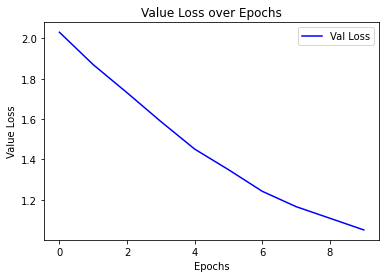

In [17]:
plt.plot(history.history['val_loss'], color = 'b', label = 'Val Loss' )
plt.title('Value Loss over Epochs')
plt.xlabel("Epochs")
plt.ylabel("Value Loss")
plt.legend()
plt.show()

[6 9 5 ... 2 3 0]
[0 0 0 ... 0 0 0]


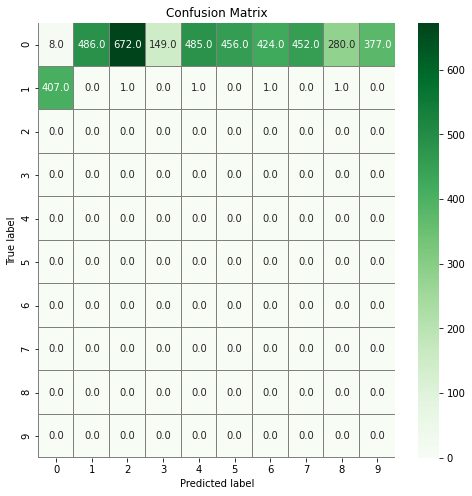

In [18]:
y_pred = model.predict(X_val)
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)
enc = OneHotEncoder()
y_val = enc.fit_transform(y_val).toarray()
y_val = np.argmax(y_val, axis=1)
con_matrix = confusion_matrix(y_val, y_pred)
print(y_val)
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(con_matrix, annot=True, linewidths=.01, cmap = "Greens", linecolor = 'gray', fmt = '.1f', ax=ax)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()
